   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 5.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.5.1
    Uninstalling fsspec-2025.5.1:
      Successfully uninstalled fsspec-2025.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.8.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 requires nv

README.md: 0.00B [00:00, ?B/s]

train-00000-of-00002.parquet:   0%|          | 0.00/166M [00:00<?, ?B/s]

train-00001-of-00002.parquet:   0%|          | 0.00/166M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/28.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/27.6M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/90447 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/7405 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7405 [00:00<?, ? examples/s]

Dataset loaded successfully!
Available splits: ['train', 'validation', 'test']

Dataset shapes:
Training set: (90447, 7)
Validation set: (7405, 7)

BASIC DATA EXPLORATION

1. Dataset Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90447 entries, 0 to 90446
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                90447 non-null  object
 1   question          90447 non-null  object
 2   answer            90447 non-null  object
 3   type              90447 non-null  object
 4   level             90447 non-null  object
 5   supporting_facts  90447 non-null  object
 6   context           90447 non-null  object
dtypes: object(7)
memory usage: 4.8+ MB
None

2. Column Names:
['id', 'question', 'answer', 'type', 'level', 'supporting_facts', 'context']

3. First few samples:
                         id  \
0  5a7a06935542990198eaf050   
1  5a879ab05542996e4f30887e   

                           

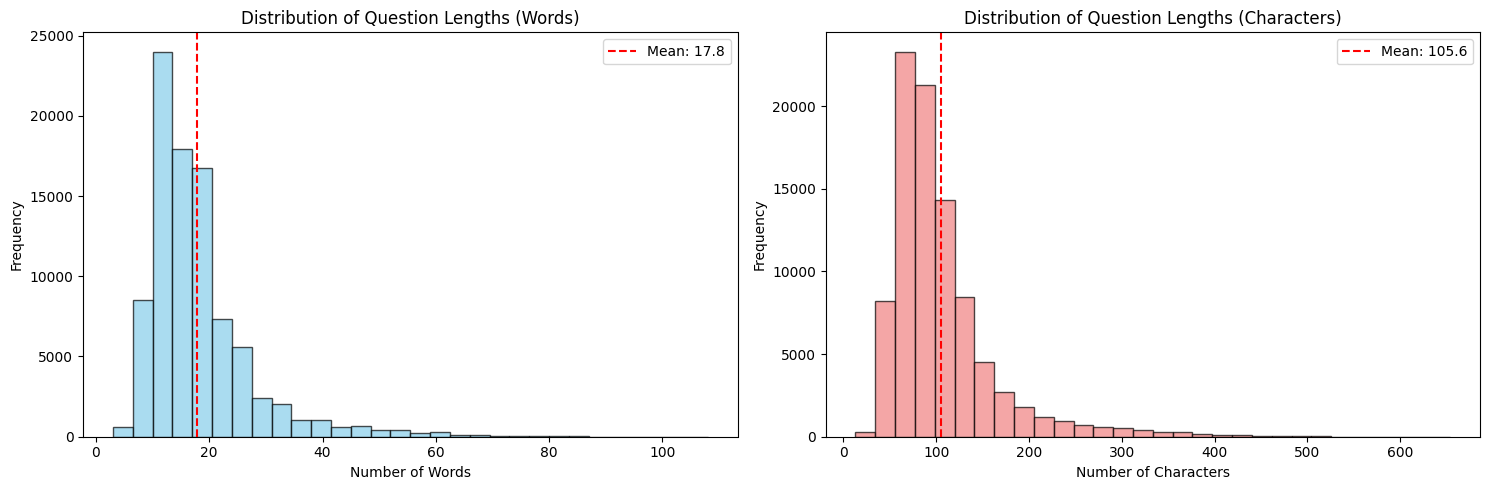


7. Question Type Analysis:
Most common question starters:
  what: 20,178 (22.3%)
  which: 12,004 (13.3%)
  the: 8,281 (9.2%)
  who: 7,626 (8.4%)
  are: 3,573 (4.0%)
  in: 3,422 (3.8%)
  when: 2,379 (2.6%)
  where: 1,649 (1.8%)
  how: 1,422 (1.6%)
  were: 614 (0.7%)

ANSWER ANALYSIS

Answer Length Statistics (words):
Mean: 2.23
Median: 2.00
Min: 1
Max: 89


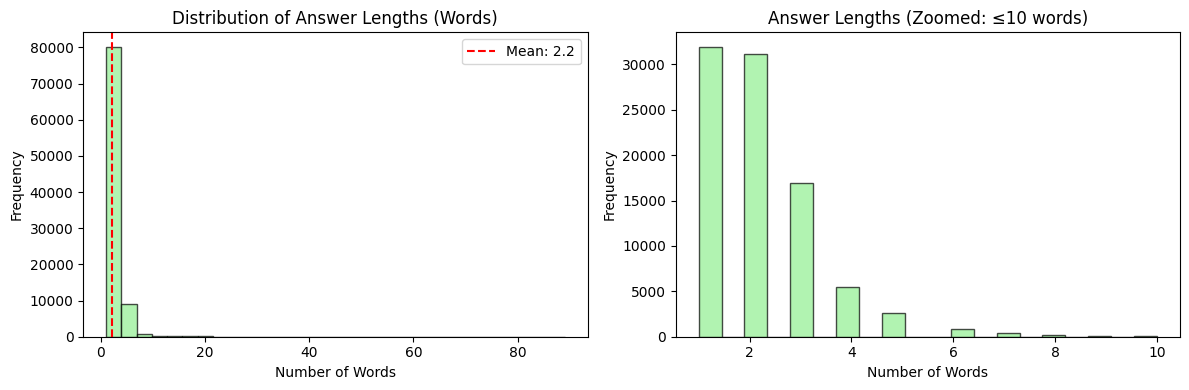


8. Most Common Answers:
  'yes': 2,748 times
  'no': 2,733 times
  'american': 617 times
  'united states': 290 times
  'film director': 210 times
  'english': 169 times
  'magazine': 161 times
  'new york city': 157 times
  'film': 155 times
  'documentary': 138 times
  'china': 136 times
  'england': 129 times
  'director': 115 times
  'singer': 112 times
  'rock': 106 times

SUPPORTING FACTS ANALYSIS
Supporting Facts Statistics:
Mean supporting facts per question: 2.00
Median: 2.00
Max: 2


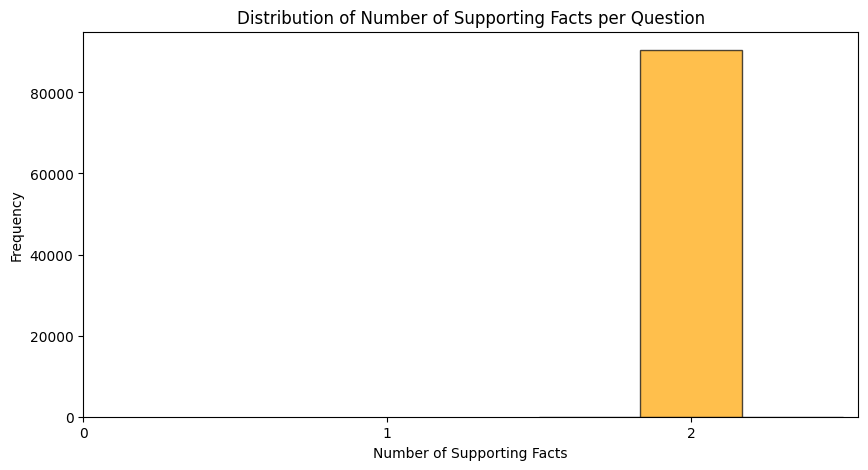


CONTEXT ANALYSIS
Context Statistics:
Mean paragraphs per question: 2.00
Median: 2.00
Max: 2

Paragraph Length Statistics (words, sample of 1000):
Mean: 46.55
Median: 12.00
Max: 373


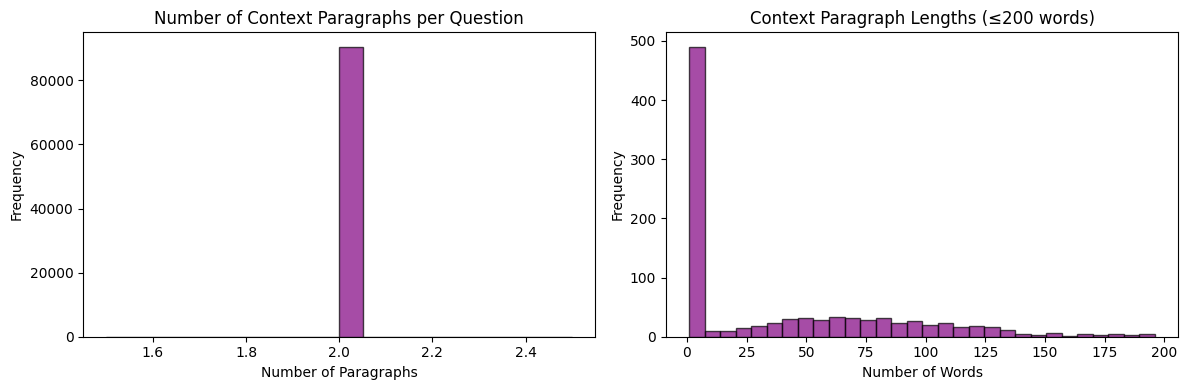


QUESTION DIFFICULTY ANALYSIS
Question difficulty distribution:
level
medium    56814
easy      17972
hard      15661
Name: count, dtype: int64


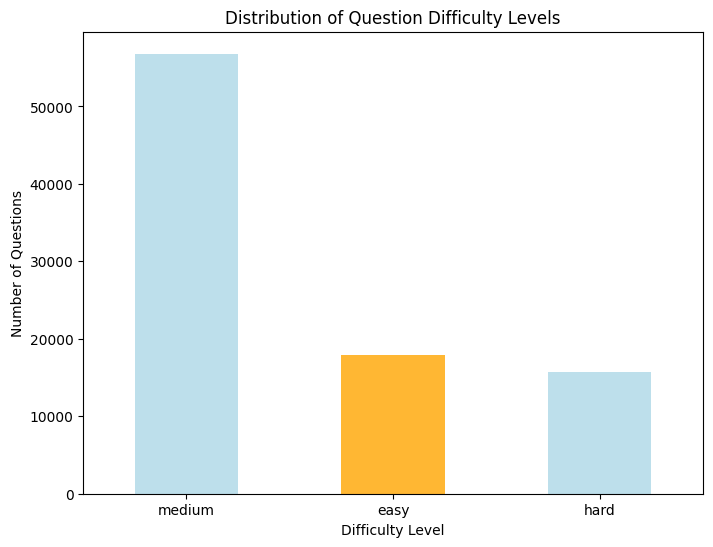


WORD CLOUD VISUALIZATION


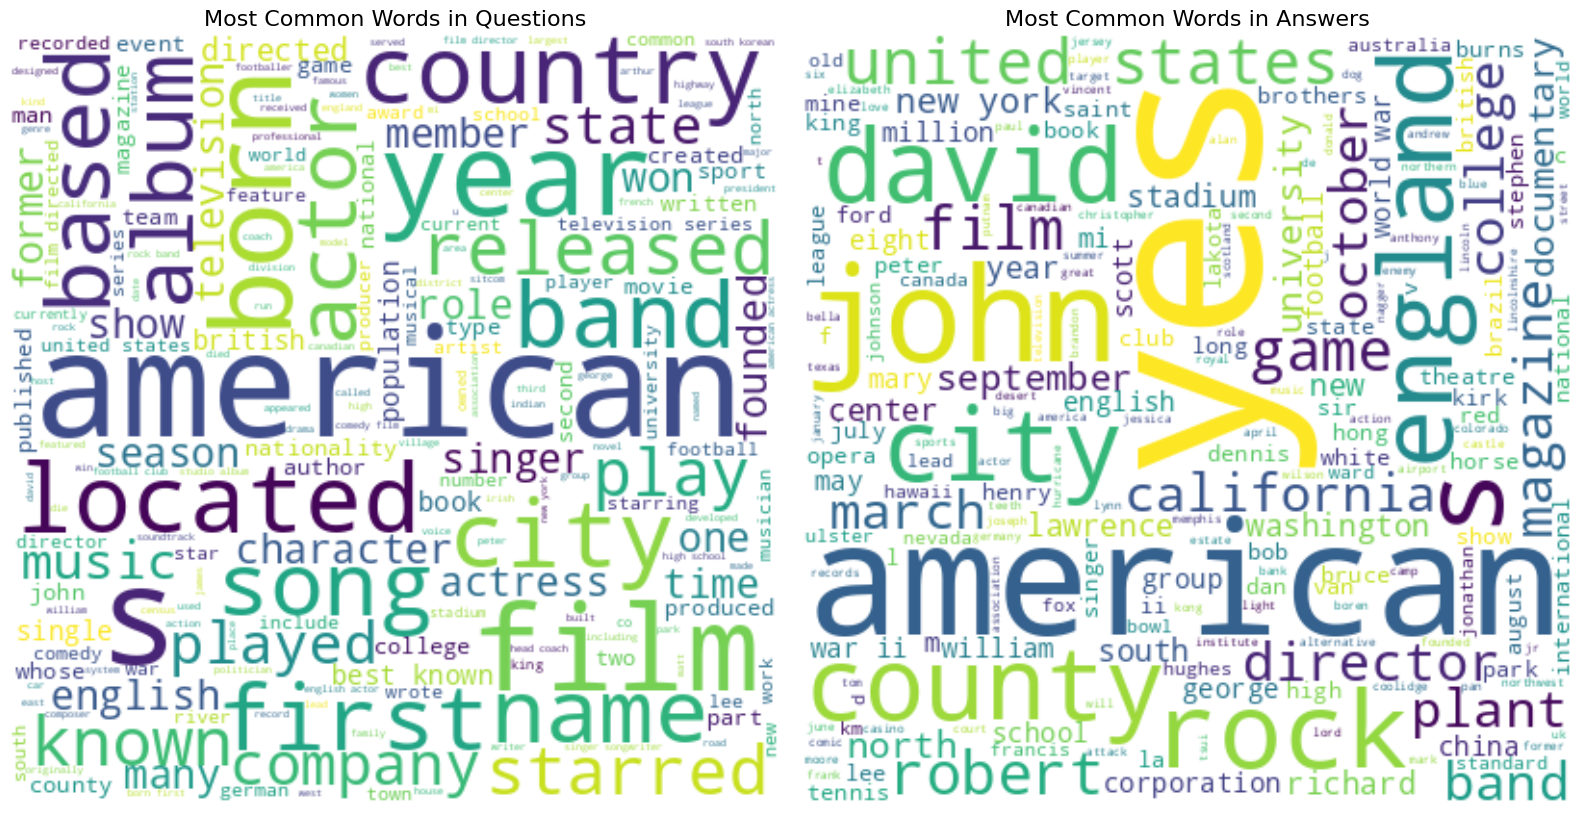


FEATURE ENGINEERING FOR LOGISTIC REGRESSION
Median answer length: 2.0 words
Target distribution: Counter({0: 63147, 1: 27300})
Creating TF-IDF features...
Feature matrix shape: (90447, 109)
Feature columns: ['question_length', 'question_char_length', 'question_has_when', 'question_has_where', 'question_has_who', 'question_has_what', 'question_has_how', 'question_has_why', 'num_context_paragraphs', 'tfidf_0']...

LOGISTIC REGRESSION MODEL TRAINING
Training set size: (72357, 109)
Test set size: (18090, 109)
Training logistic regression model...

Model Performance:
              precision    recall  f1-score   support

           0       0.72      0.96      0.83     12630
           1       0.63      0.14      0.23      5460

    accuracy                           0.72     18090
   macro avg       0.68      0.55      0.53     18090
weighted avg       0.69      0.72      0.64     18090


Top 10 Most Important Features:
               feature  importance
107           tfidf_98    5.469739


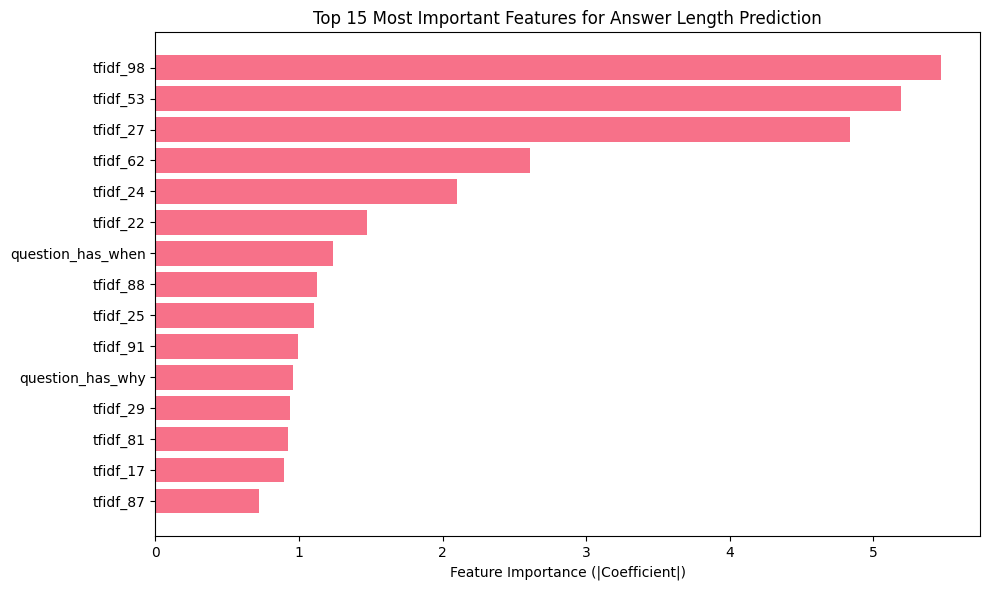

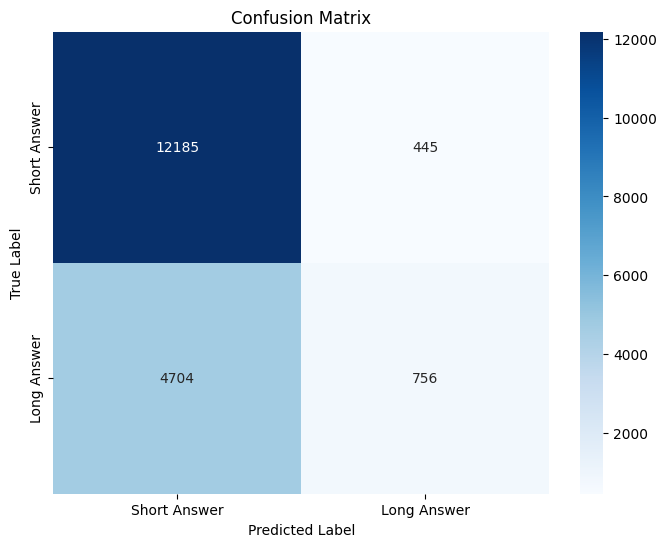


SUMMARY AND NEXT STEPS

DATASET SUMMARY:
- Total training samples: 90,447
- Total validation samples: 7,405
- Average question length: 17.8 words
- Average answer length: 2.2 words
- Model accuracy: 0.715

KEY INSIGHTS:
1. Questions are typically 18 words long
2. Most answers are short (100% are ≤3 words)
3. The dataset contains multi-hop reasoning questions
4. Question type (who/what/when/where/how/why) influences answer length



In [1]:
# Install required packages
!pip install datasets transformers pandas numpy matplotlib seaborn scikit-learn wordcloud

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette("husl")

print("Libraries imported successfully!")

from datasets import load_dataset

print("Loading HotpotQA dataset...")
print("This may take a few minutes for the first time...")

try:
    dataset = load_dataset("hotpotqa/hotpot_qa", "fullwiki")
    
    print(f"Dataset loaded successfully!")
    print(f"Available splits: {list(dataset.keys())}")
    
    train_df = pd.DataFrame(dataset['train'])
    validation_df = pd.DataFrame(dataset['validation'])
    
    print(f"\nDataset shapes:")
    print(f"Training set: {train_df.shape}")
    print(f"Validation set: {validation_df.shape}")
    
except Exception as e:
    print(f"Error loading dataset: {e}")
    print("Trying alternative loading method...")
    
    # Alternative: Load distractor setting if fullwiki fails
    dataset = load_dataset("hotpotqa/hotpot_qa", "distractor")
    train_df = pd.DataFrame(dataset['train'])
    validation_df = pd.DataFrame(dataset['validation'])
    
    print(f"Dataset loaded with distractor setting!")
    print(f"Training set: {train_df.shape}")
    print(f"Validation set: {validation_df.shape}")


print("\n" + "="*50)
print("BASIC DATA EXPLORATION")
print("="*50)

print("\n1. Dataset Structure:")
print(train_df.info())

print("\n2. Column Names:")
print(train_df.columns.tolist())

print("\n3. First few samples:")
print(train_df.head(2))

print("\n4. Data Types:")
print(train_df.dtypes)

print("\n5. Missing Values:")
missing_values = train_df.isnull().sum()
print(missing_values[missing_values > 0])

print("\n6. Dataset Statistics:")
print(f"Total training samples: {len(train_df):,}")
print(f"Total validation samples: {len(validation_df):,}")



print("\n" + "="*50)
print("QUESTION ANALYSIS")
print("="*50)

questions = train_df['question'].tolist()

def safe_string_convert(item):
    if isinstance(item, str):
        return item
    elif isinstance(item, list):
        return ' '.join([str(x) for x in item])
    else:
        return str(item)

questions = [safe_string_convert(q) for q in questions]

question_lengths = [len(q.split()) for q in questions if q.strip()]
question_char_lengths = [len(q) for q in questions if q.strip()]

print(f"\nQuestion Length Statistics (words):")
print(f"Mean: {np.mean(question_lengths):.2f}")
print(f"Median: {np.median(question_lengths):.2f}")
print(f"Min: {min(question_lengths)}")
print(f"Max: {max(question_lengths)}")
print(f"Std: {np.std(question_lengths):.2f}")

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(question_lengths, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0].set_title('Distribution of Question Lengths (Words)')
axes[0].set_xlabel('Number of Words')
axes[0].set_ylabel('Frequency')
axes[0].axvline(np.mean(question_lengths), color='red', linestyle='--', label=f'Mean: {np.mean(question_lengths):.1f}')
axes[0].legend()

axes[1].hist(question_char_lengths, bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
axes[1].set_title('Distribution of Question Lengths (Characters)')
axes[1].set_xlabel('Number of Characters')
axes[1].set_ylabel('Frequency')
axes[1].axvline(np.mean(question_char_lengths), color='red', linestyle='--', label=f'Mean: {np.mean(question_char_lengths):.1f}')
axes[1].legend()

plt.tight_layout()
plt.show()

print("\n7. Question Type Analysis:")
question_starters = [q.split()[0].lower() for q in questions if q.strip() and len(q.split()) > 0]
starter_counts = Counter(question_starters)
print("Most common question starters:")
for starter, count in starter_counts.most_common(10):
    print(f"  {starter}: {count:,} ({count/len(questions)*100:.1f}%)")



print("\n" + "="*50)
print("ANSWER ANALYSIS")
print("="*50)

answers = train_df['answer'].tolist()
answers = [safe_string_convert(a) for a in answers]

answer_lengths = [len(str(a).split()) for a in answers if str(a).strip()]
answer_char_lengths = [len(str(a)) for a in answers if str(a).strip()]

print(f"\nAnswer Length Statistics (words):")
print(f"Mean: {np.mean(answer_lengths):.2f}")
print(f"Median: {np.median(answer_lengths):.2f}")
print(f"Min: {min(answer_lengths)}")
print(f"Max: {max(answer_lengths)}")

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(answer_lengths, bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('Distribution of Answer Lengths (Words)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.axvline(np.mean(answer_lengths), color='red', linestyle='--', label=f'Mean: {np.mean(answer_lengths):.1f}')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist([l for l in answer_lengths if l <= 10], bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('Answer Lengths (Zoomed: ≤10 words)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

print("\n8. Most Common Answers:")
answer_counts = Counter([str(a).lower() for a in answers])
for answer, count in answer_counts.most_common(15):
    print(f"  '{answer}': {count:,} times")

print("\n" + "="*50)
print("SUPPORTING FACTS ANALYSIS")
print("="*50)

if 'supporting_facts' in train_df.columns:
    supporting_facts = train_df['supporting_facts'].tolist()
    
    num_supporting = [len(sf) if sf else 0 for sf in supporting_facts]
    
    print(f"Supporting Facts Statistics:")
    print(f"Mean supporting facts per question: {np.mean(num_supporting):.2f}")
    print(f"Median: {np.median(num_supporting):.2f}")
    print(f"Max: {max(num_supporting)}")
    
    plt.figure(figsize=(10, 5))
    plt.hist(num_supporting, bins=max(num_supporting)+1, alpha=0.7, color='orange', edgecolor='black')
    plt.title('Distribution of Number of Supporting Facts per Question')
    plt.xlabel('Number of Supporting Facts')
    plt.ylabel('Frequency')
    plt.xticks(range(max(num_supporting)+1))
    plt.show()


print("\n" + "="*50)
print("CONTEXT ANALYSIS")
print("="*50)

if 'context' in train_df.columns:
    contexts = train_df['context'].tolist()
    
    num_paragraphs = [len(ctx) if ctx else 0 for ctx in contexts]
    
    print(f"Context Statistics:")
    print(f"Mean paragraphs per question: {np.mean(num_paragraphs):.2f}")
    print(f"Median: {np.median(num_paragraphs):.2f}")
    print(f"Max: {max(num_paragraphs)}")
    
    all_paragraphs = []
    for ctx in contexts:
        if ctx:
            if isinstance(ctx, dict):
                for title, sentences in ctx.items():
                    if isinstance(sentences, list):
                        for sentence in sentences:
                            all_paragraphs.append(safe_string_convert(sentence))
                    else:
                        all_paragraphs.append(safe_string_convert(sentences))
            elif isinstance(ctx, list):
                for item in ctx:
                    if isinstance(item, list) and len(item) >= 2:
                        # Handle [title, sentences] format
                        title, sentences = item[0], item[1:]
                        for sentence in sentences:
                            all_paragraphs.append(safe_string_convert(sentence))
                    else:
                        all_paragraphs.append(safe_string_convert(item))
            else:
                all_paragraphs.append(safe_string_convert(ctx))
    
    # Sample for efficiency
    para_lengths = [len(para.split()) for para in all_paragraphs[:1000] if para.strip()]
    
    print(f"\nParagraph Length Statistics (words, sample of 1000):")
    print(f"Mean: {np.mean(para_lengths):.2f}")
    print(f"Median: {np.median(para_lengths):.2f}")
    print(f"Max: {max(para_lengths)}")
    
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.hist(num_paragraphs, bins=20, alpha=0.7, color='purple', edgecolor='black')
    plt.title('Number of Context Paragraphs per Question')
    plt.xlabel('Number of Paragraphs')
    plt.ylabel('Frequency')
    
    plt.subplot(1, 2, 2)
    plt.hist([l for l in para_lengths if l <= 200], bins=30, alpha=0.7, color='purple', edgecolor='black')
    plt.title('Context Paragraph Lengths (≤200 words)')
    plt.xlabel('Number of Words')
    plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

if 'level' in train_df.columns:
    print("\n" + "="*50)
    print("QUESTION DIFFICULTY ANALYSIS")
    print("="*50)
    
    level_counts = train_df['level'].value_counts()
    print("Question difficulty distribution:")
    print(level_counts)
    
    plt.figure(figsize=(8, 6))
    level_counts.plot(kind='bar', color=['lightblue', 'orange'], alpha=0.8)
    plt.title('Distribution of Question Difficulty Levels')
    plt.xlabel('Difficulty Level')
    plt.ylabel('Number of Questions')
    plt.xticks(rotation=0)
    plt.show()

print("\n" + "="*50)
print("WORD CLOUD VISUALIZATION")
print("="*50)

# Sample for efficiency
questions_text = ' '.join([q for q in questions[:1000] if q.strip()])
answers_text = ' '.join([str(a) for a in answers[:1000] if str(a).strip()])

def clean_text(text):
    text = re.sub(r'[^\w\s]', ' ', text.lower())
    text = re.sub(r'\s+', ' ', text)
    return text

questions_clean = clean_text(questions_text)
answers_clean = clean_text(answers_text)

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

wordcloud_q = WordCloud(width=400, height=400, background_color='white').generate(questions_clean)
axes[0].imshow(wordcloud_q, interpolation='bilinear')
axes[0].set_title('Most Common Words in Questions', fontsize=16)
axes[0].axis('off')

wordcloud_a = WordCloud(width=400, height=400, background_color='white').generate(answers_clean)
axes[1].imshow(wordcloud_a, interpolation='bilinear')
axes[1].set_title('Most Common Words in Answers', fontsize=16)
axes[1].axis('off')

plt.tight_layout()
plt.show()

print("\n" + "="*50)
print("FEATURE ENGINEERING FOR LOGISTIC REGRESSION")
print("="*50)

# We'll create a binary classification task: predict if answer length is > median
median_answer_length = np.median(answer_lengths)
print(f"Median answer length: {median_answer_length} words")

y = [1 if length > median_answer_length else 0 for length in answer_lengths]
print(f"Target distribution: {Counter(y)}")

features_df = pd.DataFrame()

features_df['question_length'] = question_lengths
features_df['question_char_length'] = question_char_lengths
features_df['question_has_when'] = [1 if 'when' in q.lower() else 0 for q in questions if q.strip()]
features_df['question_has_where'] = [1 if 'where' in q.lower() else 0 for q in questions if q.strip()]
features_df['question_has_who'] = [1 if 'who' in q.lower() else 0 for q in questions if q.strip()]
features_df['question_has_what'] = [1 if 'what' in q.lower() else 0 for q in questions if q.strip()]
features_df['question_has_how'] = [1 if 'how' in q.lower() else 0 for q in questions if q.strip()]
features_df['question_has_why'] = [1 if 'why' in q.lower() else 0 for q in questions if q.strip()]

if 'context' in train_df.columns:
    features_df['num_context_paragraphs'] = num_paragraphs

# Add TF-IDF features (limited to top 100 features for efficiency)
print("Creating TF-IDF features...")
valid_questions = [q for q in questions if q.strip()]
tfidf = TfidfVectorizer(max_features=100, stop_words='english', lowercase=True)
tfidf_features = tfidf.fit_transform(valid_questions)
tfidf_df = pd.DataFrame(tfidf_features.toarray(), 
                          columns=[f'tfidf_{i}' for i in range(tfidf_features.shape[1])])

# Ensure we have the same number of rows
if len(tfidf_df) != len(features_df):
    # Pad or trim as necessary
    min_length = min(len(tfidf_df), len(features_df))
    tfidf_df = tfidf_df.iloc[:min_length]
    features_df = features_df.iloc[:min_length]
    y = y[:min_length]

features_df = pd.concat([features_df.reset_index(drop=True), 
                           tfidf_df.reset_index(drop=True)], axis=1)

print(f"Feature matrix shape: {features_df.shape}")
print(f"Feature columns: {features_df.columns.tolist()[:10]}...")

print("\n" + "="*50)
print("LOGISTIC REGRESSION MODEL TRAINING")
print("="*50)

X_train, X_test, y_train, y_test = train_test_split(
    features_df, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

print("Training logistic regression model...")
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)
y_pred_proba = lr_model.predict_proba(X_test)[:, 1]

print("\nModel Performance:")
print(classification_report(y_test, y_pred))

feature_importance = pd.DataFrame({
    'feature': features_df.columns,
    'importance': abs(lr_model.coef_[0])
}).sort_values('importance', ascending=False)

print(f"\nTop 10 Most Important Features:")
print(feature_importance.head(10))

plt.figure(figsize=(10, 6))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Feature Importance (|Coefficient|)')
plt.title('Top 15 Most Important Features for Answer Length Prediction')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Short Answer', 'Long Answer'],
            yticklabels=['Short Answer', 'Long Answer'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print("\n" + "="*50)
print("SUMMARY AND NEXT STEPS")
print("="*50)

print(f"""
DATASET SUMMARY:
- Total training samples: {len(train_df):,}
- Total validation samples: {len(validation_df):,}
- Average question length: {np.mean(question_lengths):.1f} words
- Average answer length: {np.mean(answer_lengths):.1f} words
- Model accuracy: {(y_pred == y_test).mean():.3f}

KEY INSIGHTS:
1. Questions are typically {np.mean(question_lengths):.0f} words long
2. Most answers are short ({np.mean([1 for l in answer_lengths if l <= 3]):.0%} are ≤3 words)
3. The dataset contains multi-hop reasoning questions
4. Question type (who/what/when/where/how/why) influences answer length
""")